**<h1>CAMPUS RECRUITMENT PROBLEM</h1>**

---



**AIM 1:** To prepare a machine learning model for predicting who will recieve placement offers <br> <br>
**AIM 2:** To further analyse and predict that what package will be offered to students. <br> <br>
(The dataset has been obtained from Kaggle)



---



---



# LOADING THE LIBRARIES AND DATASET

In [54]:
#loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

In [2]:
from google.colab import files
data_to_load= files.upload()

Saving Placement_data_project.csv to Placement_data_project.csv


In [4]:
#reading data into the notebook
pl_data= pd.read_csv('Placement_data_project.csv')
pl_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
#renaming the column names to make it more clear
pl_data.rename(columns={'ssc_p':'Class10', 'ssc_b':'Board_of_Education_Class10','hsc_p':'Class12','hsc_b':'Board_of_Education_Class12','hsc_s':'Stream_Class12','degree_p':'Degree_Percentage','degree_t':'Degree_field','etest_p':'Employbility_test','mba_p':'MBA_Percentage'},inplace= True)

In [6]:
pl_data.head()

,sl_no,gender,Class10,Board_of_Education_Class10,Class12,Board_of_Education_Class12,Stream_Class12,Degree_Percentage,Degree_field,workex,Employbility_test,specialisation,MBA_Percentage,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
#information regarding the placement data
pl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sl_no                       215 non-null    int64  
 1   gender                      215 non-null    object 
 2   Class10                     215 non-null    float64
 3   Board_of_Education_Class10  215 non-null    object 
 4   Class12                     215 non-null    float64
 5   Board_of_Education_Class12  215 non-null    object 
 6   Stream_Class12              215 non-null    object 
 7   Degree_Percentage           215 non-null    float64
 8   Degree_field                215 non-null    object 
 9   workex                      215 non-null    object 
 10  Employbility_test           215 non-null    float64
 11  specialisation              215 non-null    object 
 12  MBA_Percentage              215 non-null    float64
 13  status                      215 non



---



---



# VISUALIZING THE DATA 

##1.Relationship between Class 10 Percentage, Board of 10th Grade Examination and the Status of Placement

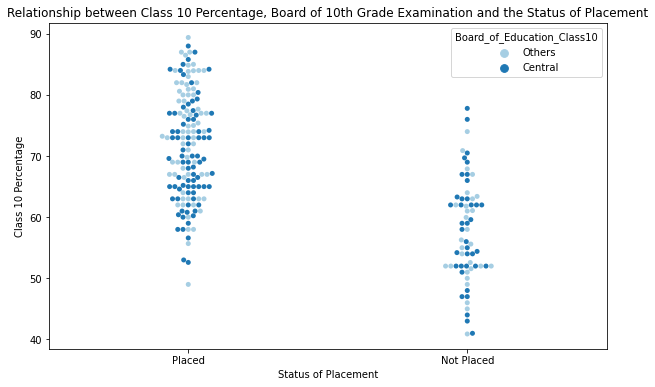

In [8]:
plt.figure(figsize=(10,6))
plt.title('Relationship between Class 10 Percentage, Board of 10th Grade Examination and the Status of Placement')
fig1=sns.swarmplot(y= pl_data['Class10'],x= pl_data['status'],palette='Paired', hue= pl_data['Board_of_Education_Class10'])
fig1.set(xlabel='Status of Placement',ylabel='Class 10 Percentage')
plt.show()

**<h3>Observation:</h3>**
* As observed in the plot above, most of the students who were placed scored more than 60% in their 10th class examination.
* Most of the students who were not placed did not score well in their 10th grade examination.
* According to the data, the board of examination is not considered during the placements.

**<h3>Conclusion:</h3>**
<h5>Class 10th percentage will be considered for prediction but Class 10 Board of Examination is not a good indicator for placements.</h5>



## 2.Relationship between 12th Percentage, Class 12 Board of Examination and Status of Placement

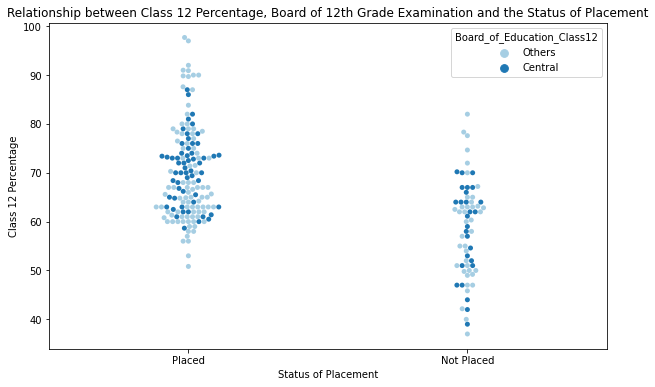

In [9]:
plt.figure(figsize=(10,6))
plt.title('Relationship between Class 12 Percentage, Board of 12th Grade Examination and the Status of Placement')
fig1=sns.swarmplot(y= pl_data['Class12'],x= pl_data['status'],palette='Paired', hue= pl_data['Board_of_Education_Class12'])
fig1.set(xlabel='Status of Placement',ylabel='Class 12 Percentage')
plt.show()

**<h3>Observation:</h3>**
* According to the plot, 12th Class grades have been used as a criteria for placement. 
* Similar to Class 10, the Board of Education is not a criteria for placement.

**<h3>Conclusion:</h3>**
<h5>Therefore, 12th class percentage will be used for prediction whereas the board of education will be excluded.</h5>

## 3.Relationship between 12th Grade Stream of Study and Status of Placement
(USED CLASS 12 PERCENTAGE FOR THIS COMPARISON)

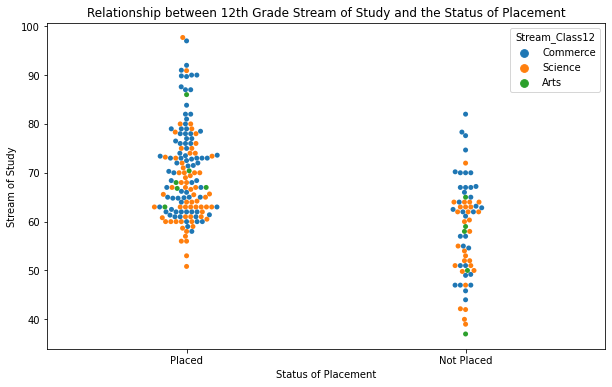

In [10]:
plt.figure(figsize=(10,6))
plt.title('Relationship between 12th Grade Stream of Study and the Status of Placement')
fig1=sns.swarmplot(y= pl_data['Class12'],x= pl_data['status'], hue= pl_data['Stream_Class12'])
fig1.set(xlabel='Status of Placement',ylabel='Stream of Study')
plt.show()

**<h3>Observation:</h3>**
<h5>The stream of study is clearly an indicator of placements. Most of the students belonging to Commerce stream have been placed followed by Science and Arts respectively.</h5>

**<h3>Conclusion:</h5>**
<h5>Therefore, stream of study will be used as a criteia for prediction.</h5>



## 4.Relationship between Degree Percentage, Degree Field and Status of Placement

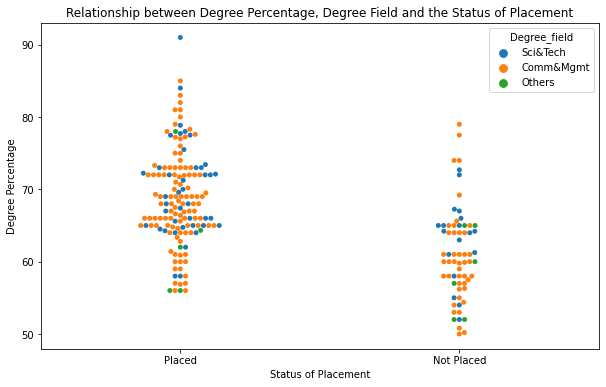

In [11]:
plt.figure(figsize=(10,6))
plt.title('Relationship between Degree Percentage, Degree Field and the Status of Placement')
fig1=sns.swarmplot(y= pl_data['Degree_Percentage'],x= pl_data['status'], hue= pl_data['Degree_field'])
fig1.set(xlabel='Status of Placement',ylabel='Degree Percentage')
plt.show()

**<h3>Observation:</h3>**
* As observed from the plot above, most of the data points belong to the field of Commerce & Management, followed by Science & Technology and Others respectively.
* There is more demand for the field of Commerce and Management, both amoung students and recruiters.
* Majorly, the students who have scored more than 60% have been placed. Some exceptions/outliers do exist.

**<h3>Conclusion:</h3>**
* Field of degree study will be considered as a critrion for prediction.
* The percentage obtained is also an indicator of the placement status.

## 5.Relationship between Employbility Test, Work Experience and the Status of Placement

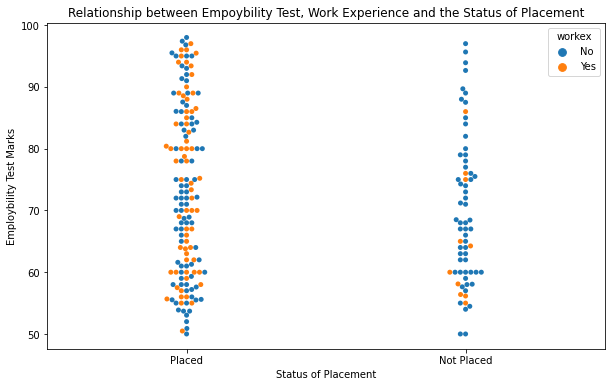

In [12]:
plt.figure(figsize=(10,6))
plt.title('Relationship between Empoybility Test, Work Experience and the Status of Placement')
fig1=sns.swarmplot(y= pl_data['Employbility_test'],x= pl_data['status'], hue= pl_data['workex'])
fig1.set(xlabel='Status of Placement',ylabel='Employbility Test Marks')
plt.show()

**<h3>Observation:</h3>**
* As observed from the graph above, most of the people having prior work experience have been placed.
* The marks in the employbility test is not a reliable factor as ranging from 50 to 100 marks, people have been placed. Some candidates who have scored 90+ have not been placed.

**<h3>Conclusion:</h3>**
* In accordance to the observations, the work experiencewill be included as a vital factor for placement.
* The Employbility test marks is not a very reliable factor for prediction.

## 6.Relationship between MBA Specialization, MBA percentage and the Status of Placement

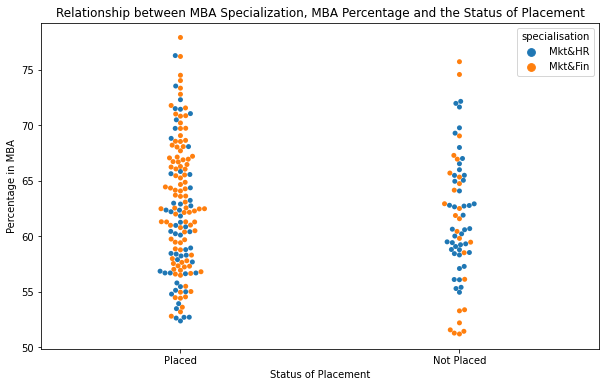

In [13]:
plt.figure(figsize=(10,6))
plt.title('Relationship between MBA Specialization, MBA Percentage and the Status of Placement')
fig1=sns.swarmplot(y= pl_data['MBA_Percentage'],x= pl_data['status'], hue= pl_data['specialisation'])
fig1.set(xlabel='Status of Placement',ylabel='Percentage in MBA')
plt.show()

**<h3>Observation:</h3>**
* According to the graph above, the percentage in MBA is not a very important criteria for prediction.
* Most of the candidates who have been placed belong to the Marketing and Finance background.

**<h3>Conclusion:</h3>**
* Therefore considering the observations, MBA percentage will not be taken as a criteria for placement.
* MBA Specialization is a significant indicator of the placement status, therefore it will be considered for placement.

# PREPROCESSING THE DATA

In [14]:
#encoDing the categorical data
encoder= LabelEncoder()
pl_data['specialisation_encoded']= encoder.fit_transform(pl_data.specialisation)
pl_data['workex_encoded']= encoder.fit_transform(pl_data.workex)
pl_data['Degree_field_encoded']= encoder.fit_transform(pl_data.Degree_field)
pl_data['Degree_field_encoded']= encoder.fit_transform(pl_data.Degree_field)
pl_data['Stream_Class12_encoded']= encoder.fit_transform(pl_data.Stream_Class12)
pl_data['status_encoded']= encoder.fit_transform(pl_data.status)

In [15]:
#defining X as the factors which will be used for prediction
criteria= ['Class10','Class12','Stream_Class12_encoded','Degree_Percentage','Degree_field_encoded','workex_encoded','specialisation_encoded']
X= pl_data[criteria]
y= pl_data['status_encoded']

In [16]:
#train and validation data split
train_X, test_X, train_y, test_y= train_test_split(X,y, random_state=0, test_size=0.41)

# PREDICTION OF THE STATUS OF PLACEMENT (AIM 1)

In [17]:
pl_model= XGBClassifier(ax_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=1000,
                        learning_rate = 0.01)
pl_model.fit(train_X, train_y, 
             early_stopping_rounds=3, 
             eval_set=[(test_X, test_y)], 
             verbose=True)

[0]	validation_0-error:0.191011
Will train until validation_0-error hasn't improved in 3 rounds.
[1]	validation_0-error:0.179775
[2]	validation_0-error:0.168539
[3]	validation_0-error:0.168539
[4]	validation_0-error:0.168539
[5]	validation_0-error:0.168539
Stopping. Best iteration:
[2]	validation_0-error:0.168539



XGBClassifier(ax_depth=12, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.33, verbosity=1)

In [18]:
#Here, 1 is placed and 0 is not placed

pl_prediction= pl_model.predict(test_X)
pl_prediction

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1])

In [20]:
accuracy = accuracy_score(test_y, pl_prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.15%


# ANALYSING AND CREATING A MODEL FOR AIM 2

Now that we have completed a model for predicting the status of placement of candidates, lets create another model for predicting the packages which will be offered to the ones placed. 

## 1. Analyzing the Packages Offered

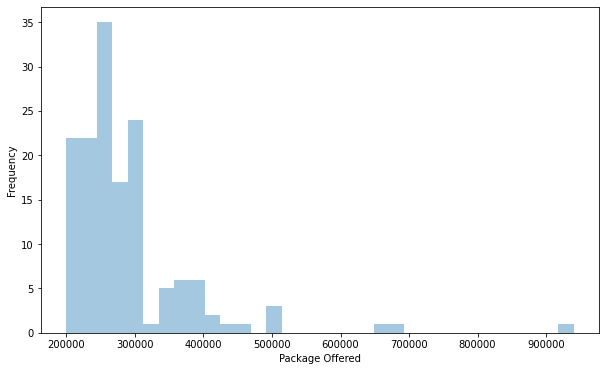

In [33]:
plt.figure(figsize=(10,6))
fig2=sns.distplot(pl_data['salary'], kde=False)
fig2.set(xlabel='Package Offered', ylabel='Frequency')
plt.show()

<h4> As we can observe from the graph above, most of the candidates who have been placed have been offered a salary of 2L to 3L. Only very few have recieved packages greater than that. </h4>

## 2.Preparing the Model

In [45]:
pl_data['salary'] = pl_data['salary'].astype(np.int64)

In [48]:
#as here, there is a new target, we will use train and test split
criteria_sal= ['Class10','Class12','Stream_Class12_encoded','Degree_Percentage','Degree_field_encoded','workex_encoded','specialisation_encoded','status_encoded']
X= pl_data[criteria_sal]
y= pl_data['salary']
#train and validation data split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0, test_size=0.41)

In [64]:
model_sal= XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_sal.fit(X_train, y_train, 
             early_stopping_rounds=3, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

[17:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [63]:
#predicting the values
sal_prediction= model_sal.predict(X_test)

In [71]:
#calculate mean absolute error
mae_1 =  mean_absolute_error(sal_prediction, y_test)
print("Mean Absolute Error:" , mae_1)

Mean Absolute Error: 30139.268361163944


In [72]:
#cross validation score
scores = -1 * cross_val_score(model_sal, X, y,
                              cv=5,
                              scoring='neg_mean_squared_error')

print("MSE scores:\n", scores)

[18:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE scores:
 [6.79906989e+09 5.36624967e+09 1.51592427e+10 6.26853811e+09
 4.80617394e+09]


**<h3>PROJECT BY: <br>
MANASVI LOGANI</h3>**